In [48]:
import sys
sys.path.append("../Pupillengröße/Skripte/")
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging as log
from numpy.fft import fft

from preprocessfunction2 import PLR2d
from preprocessfunction3 import PLR3d
import checkdata
import importlib
from IPython.display import display
def display_all(df):
    from IPython.display import HTML, display
    IPython.display(IPython.HTML(df.to_html()))


'Starting process2'

'Loop through each annotation timestamp and slice the data'

nan% of diameter_3d=76.41129032258064
nan% of diameter_3d_gated=76.71370967741936
nan% of diameter_3d=70.67530064754857
nan% of diameter_3d_gated=70.8140610545791
nan% of diameter_3d=65.50237812128418
nan% of diameter_3d_gated=65.56183115338882
nan% of diameter_3d=71.57164869029276
nan% of diameter_3d_gated=71.60246533127889
nan% of diameter_3d=58.94079143112169
nan% of diameter_3d_gated=58.97054448080928
nan% of diameter_3d=63.448682658277626
nan% of diameter_3d_gated=63.546991742036965
nan% of diameter_3d=78.21543408360128
nan% of diameter_3d_gated=78.45659163987138
nan% of diameter_3d=83.66906474820144
nan% of diameter_3d_gated=83.88489208633094
nan% of diameter_3d=83.7573385518591
nan% of diameter_3d_gated=83.7573385518591
nan% of diameter_3d=80.18394648829431
nan% of diameter_3d_gated=80.43478260869566
nan% of diameter_3d=82.25352112676056
nan% of diameter_3d_gated=82.3943661971831
nan% of diameter_3d=79.04612978889757
nan% of diameter_3d_gated=79.35887412040657
nan% of diameter_3

'Label the data'

'preprocess and slice data'

'nanp before=76.71370967741936, nanp after=0.3024193548387097'

'nanp before=70.8140610545791, nanp after=0.16188714153561518'

'nanp before=65.56183115338882, nanp after=0.029726516052318668'

'nanp before=71.60246533127889, nanp after=0.061633281972265024'

'nanp before=58.97054448080928, nanp after=0.05950609937518596'

'nanp before=63.546991742036965, nanp after=6.488399528116398'

'nanp before=78.45659163987138, nanp after=20.418006430868168'

'nanp before=83.88489208633094, nanp after=0.14388489208633093'

'nanp before=83.7573385518591, nanp after=0.32615786040443573'

'nanp before=80.43478260869566, nanp after=0.16722408026755853'

'nanp before=82.3943661971831, nanp after=0.4225352112676056'

'nanp before=79.35887412040657, nanp after=0.39093041438623927'

'nanp before=79.13279132791328, nanp after=0.0'

'nanp before=73.89620449264136, nanp after=0.30983733539891556'

'nanp before=78.89641819941917, nanp after=0.0'

'nanp before=60.69802731411229, nanp after=0.15174506828528073'

'nanp before=88.78143133462282, nanp after=0.9671179883945842'

'nanp before=81.89964157706093, nanp after=0.8960573476702509'

'nanp before=85.71428571428571, nanp after=1.335113484646195'

'nanp before=68.47153465346534, nanp after=0.12376237623762376'

'merge dataframes'

'save processed data to /home/marco/Nextcloud/KatharinaBeispieldaten//PJ06_3_Ruhe-30Stim-eye_id0-diameter_3d_list.csv and /home/marco/Nextcloud/KatharinaBeispieldaten//PJ06_3_Ruhe-30Stim-eye_id0-diameter_3d_mean.csv'

time_slot   eye_id  diameter_3d
0           0.0  eye_id0     4.388824
1           1.0  eye_id0     4.397668
2           2.0  eye_id0     4.436024
3           3.0  eye_id0     4.408568
4           4.0  eye_id0     4.314161
...         ...      ...          ...
996       996.0  eye_id0          NaN
997       997.0  eye_id0          NaN
998       998.0  eye_id0          NaN
999       999.0  eye_id0          NaN
1000     1000.0  eye_id0          NaN

[1001 rows x 3 columns]

'Anzahl der Messungen: 20'

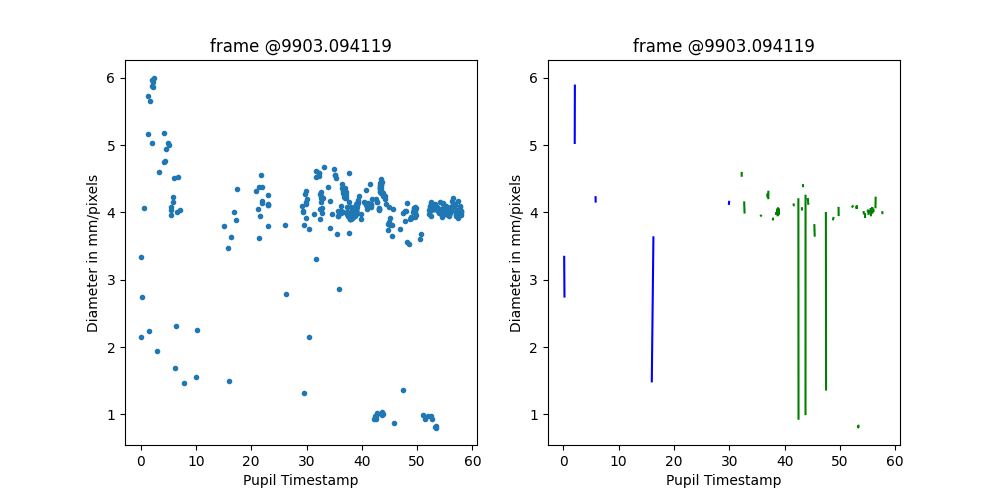

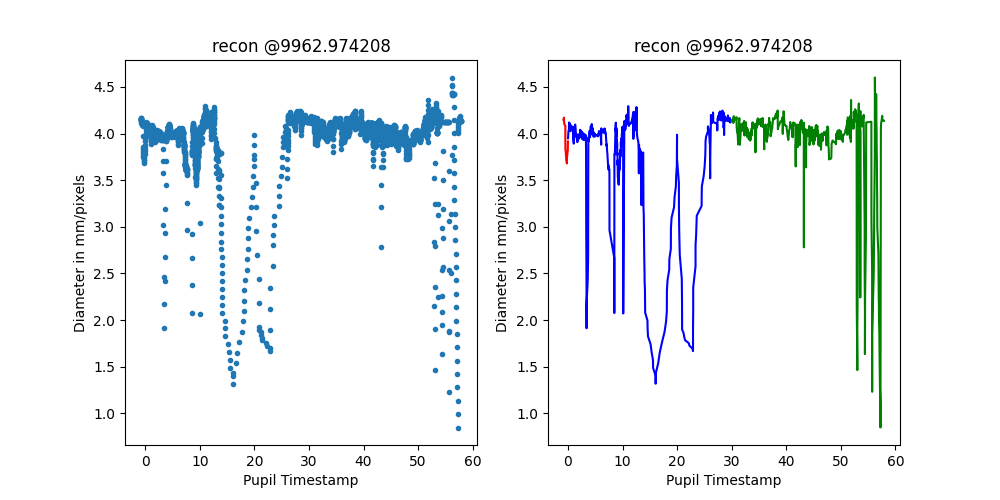

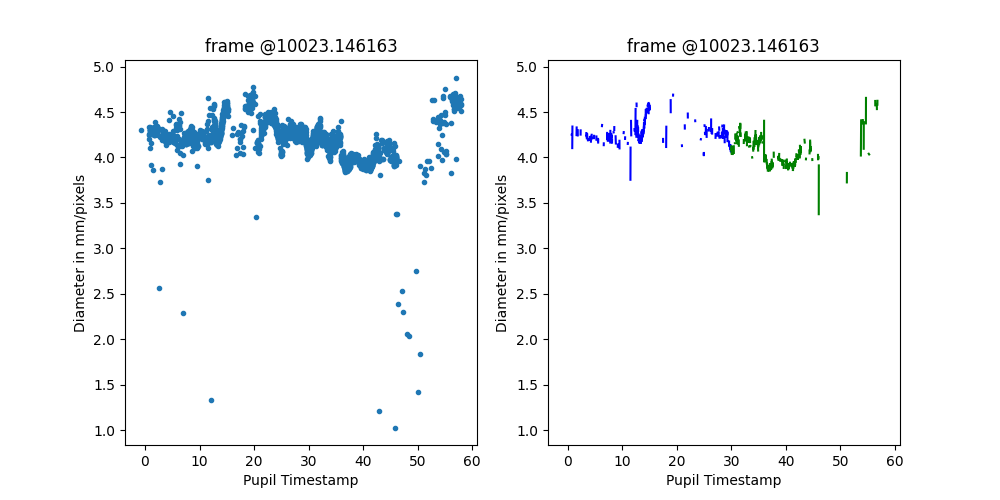

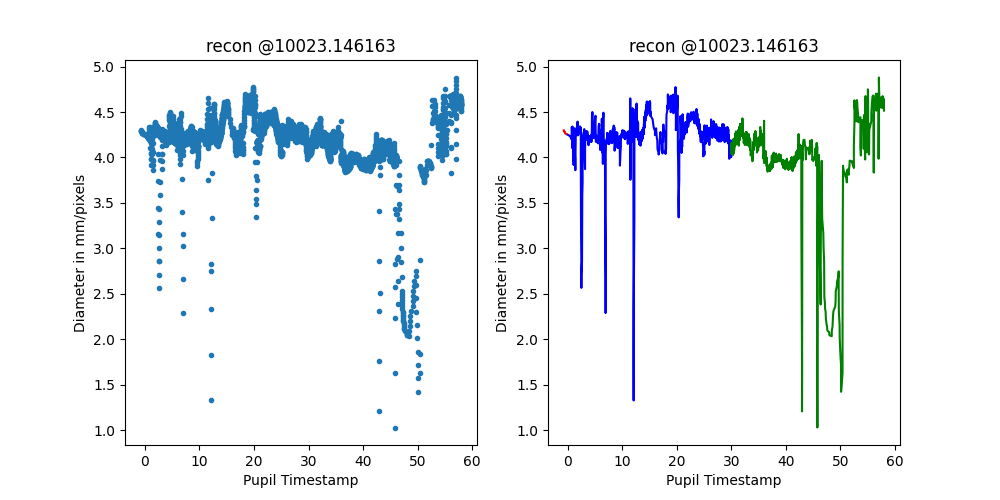

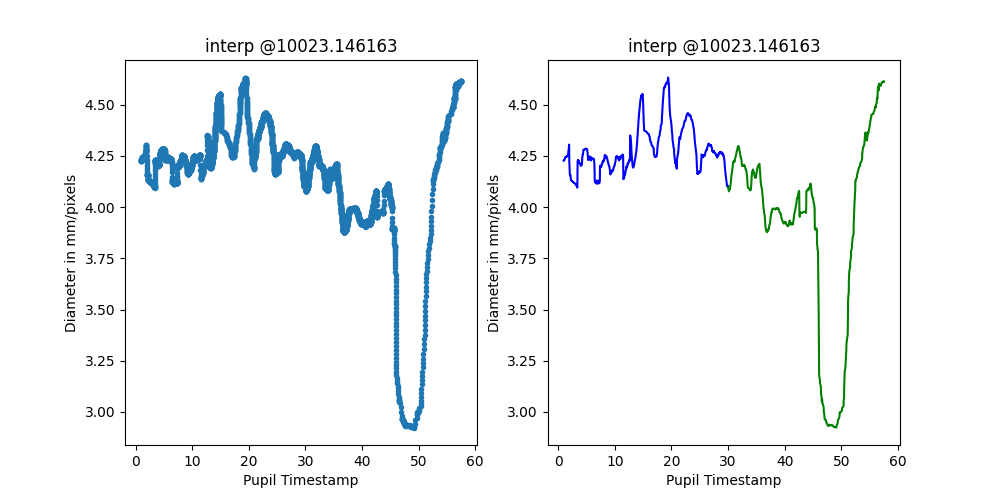

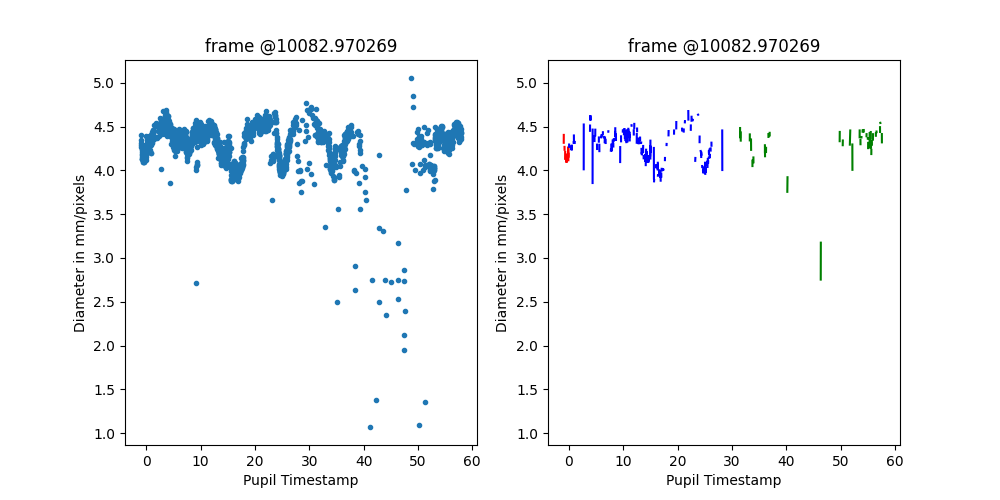

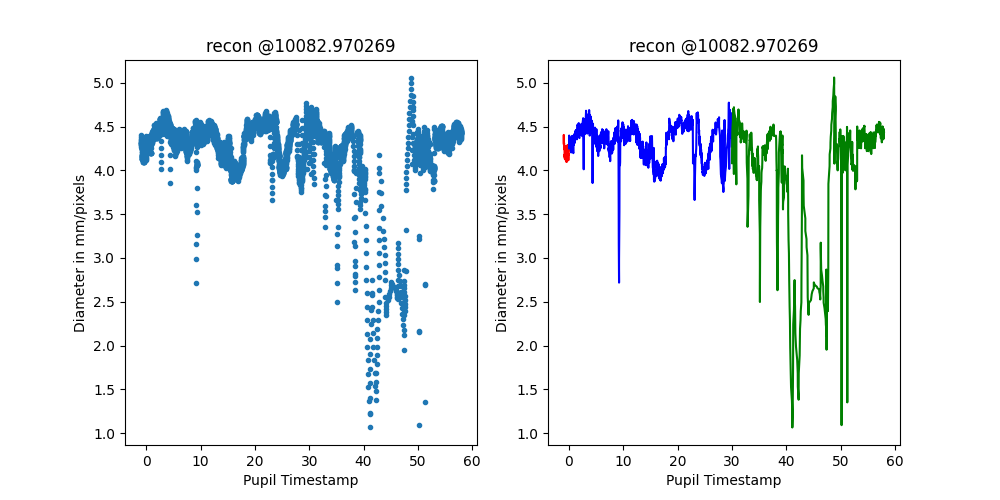

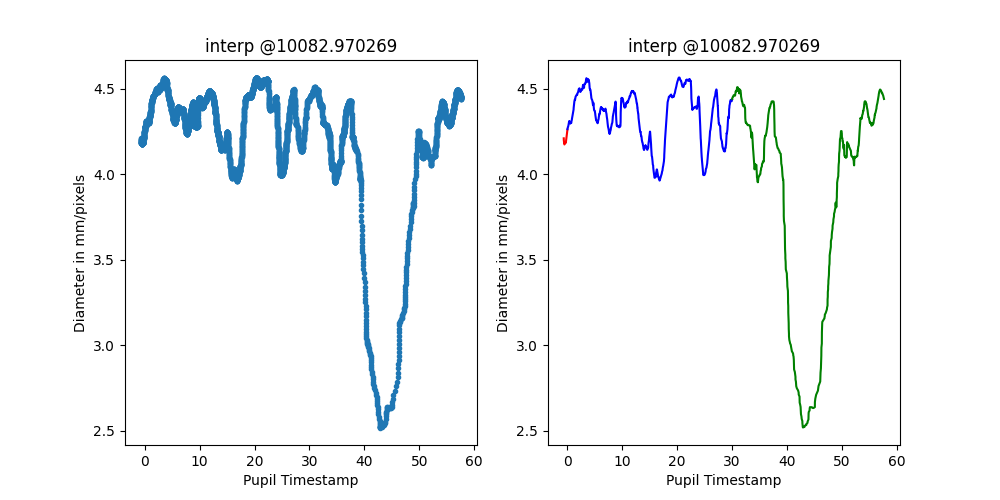

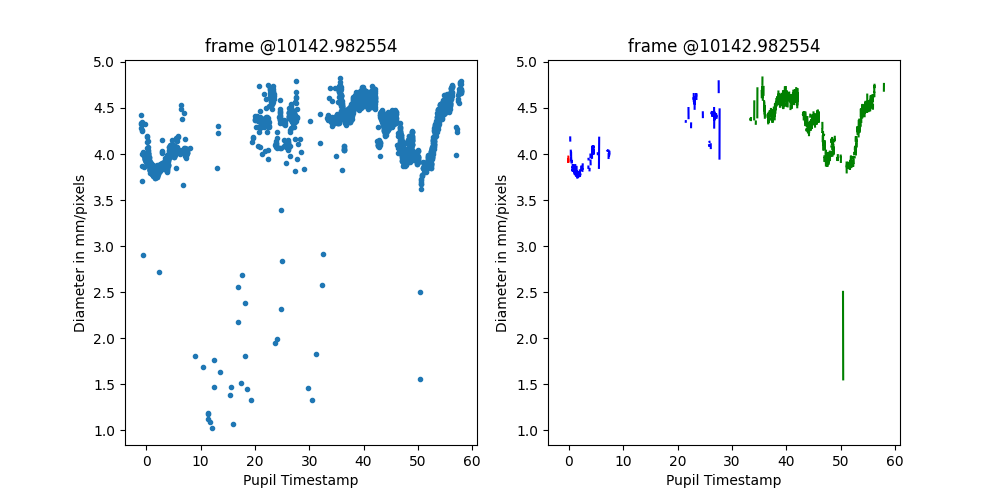

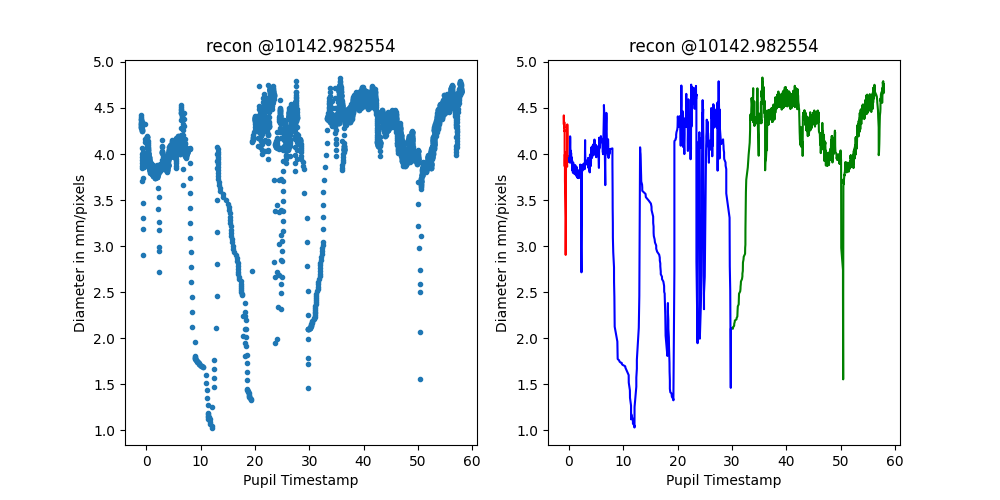

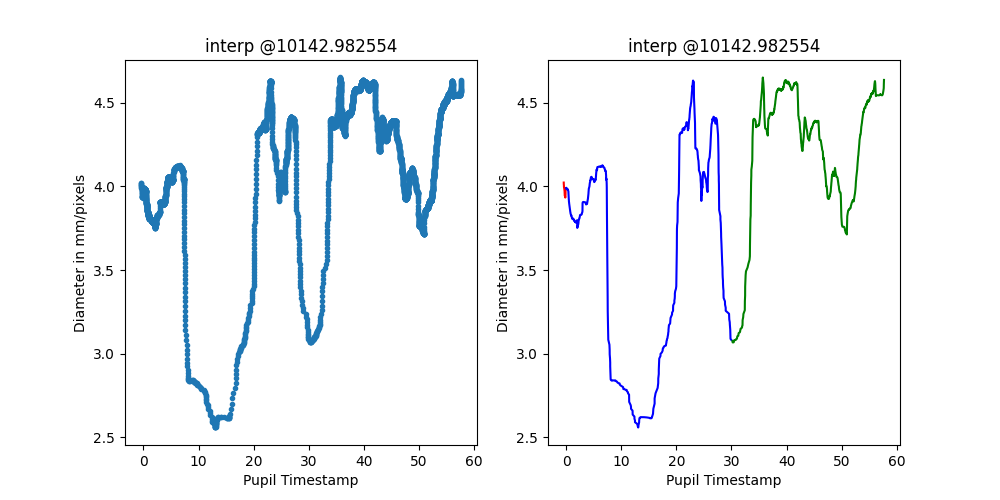

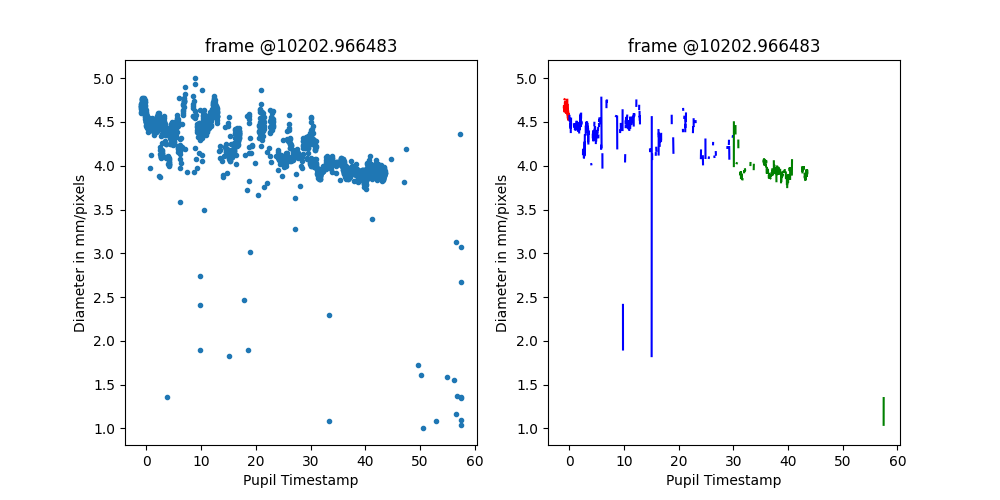

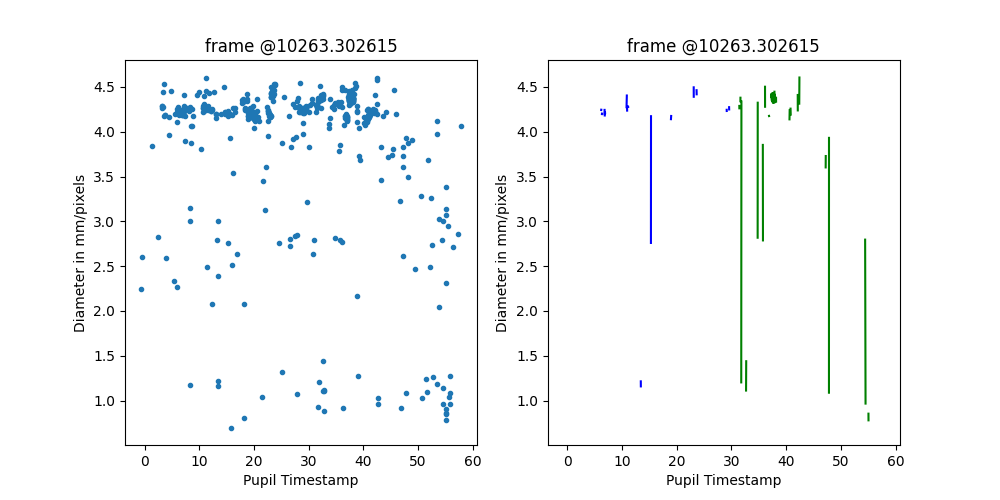

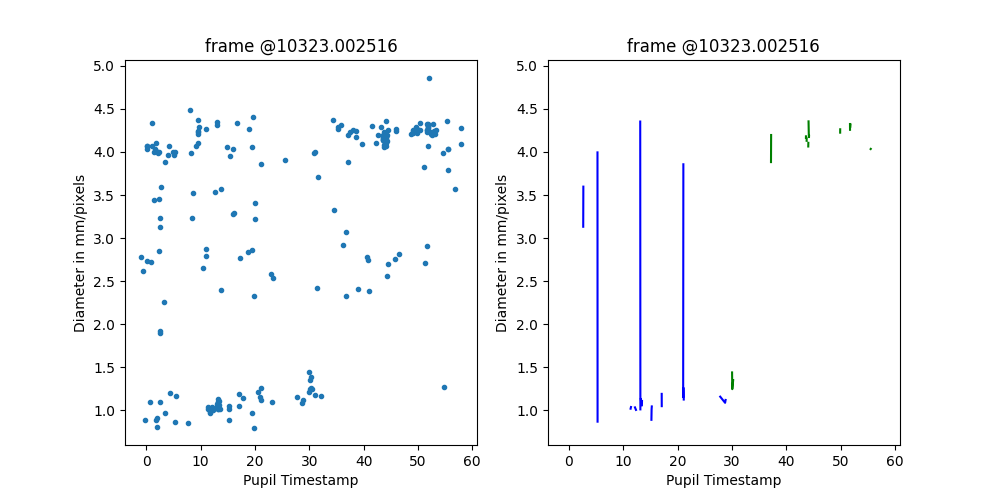

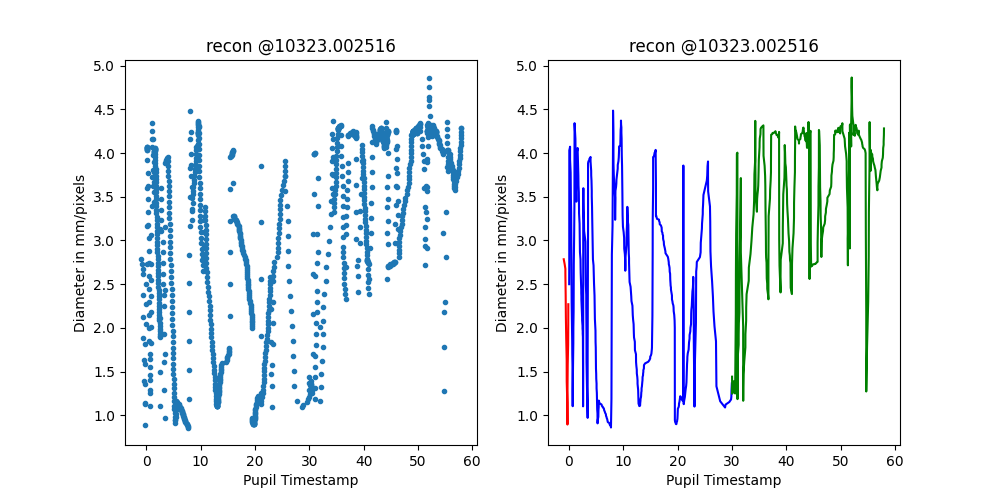

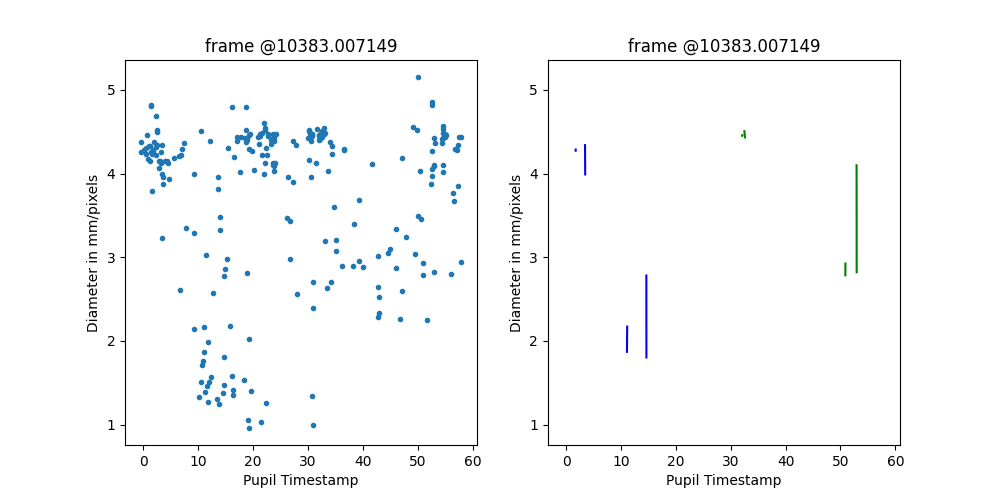

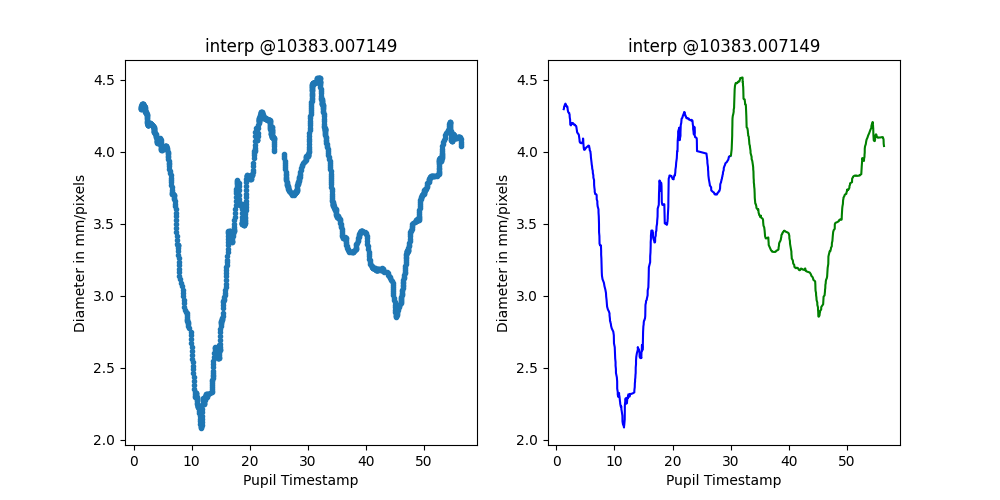

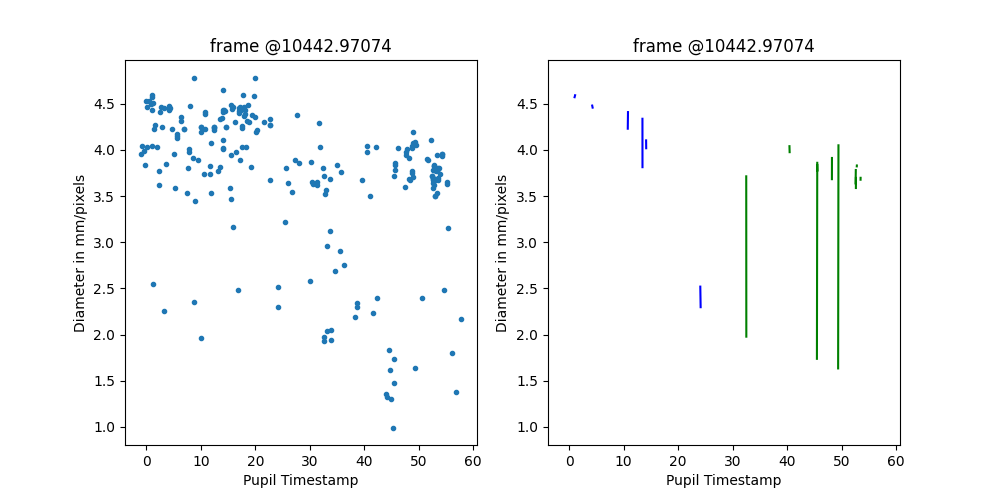

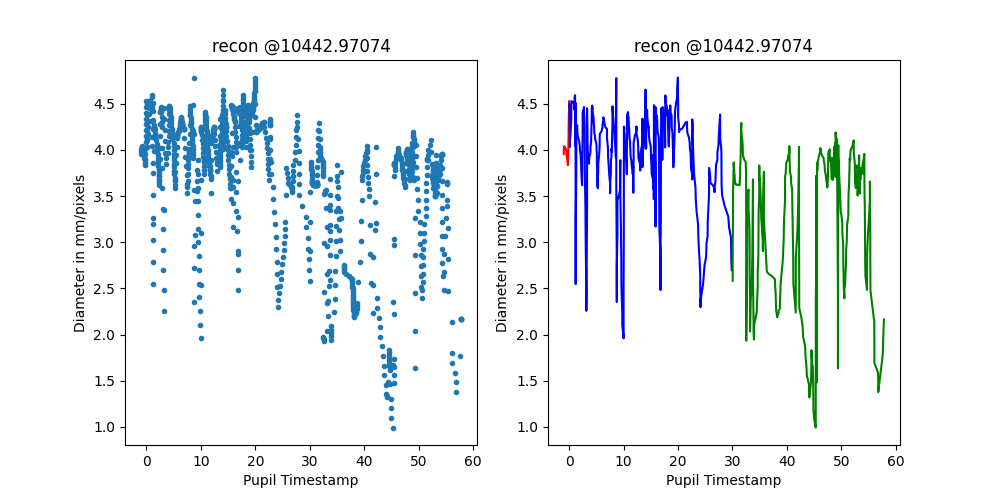

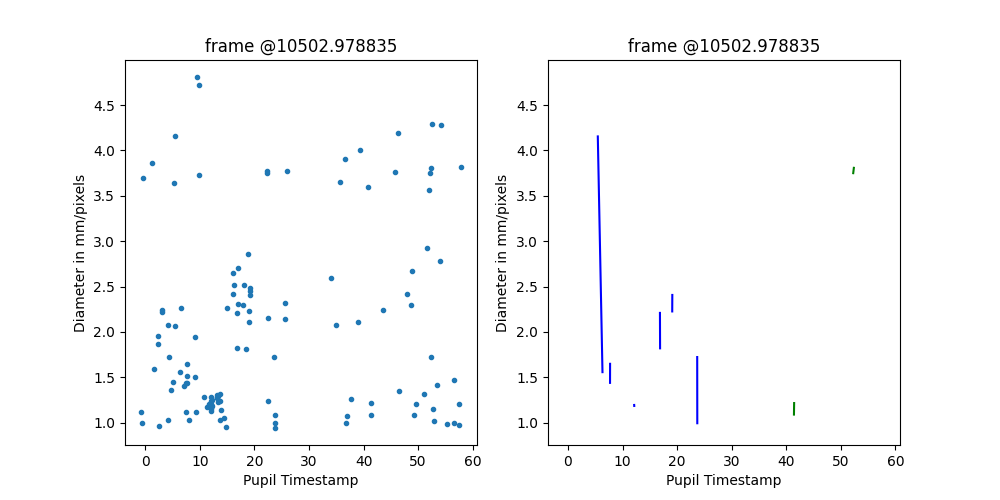

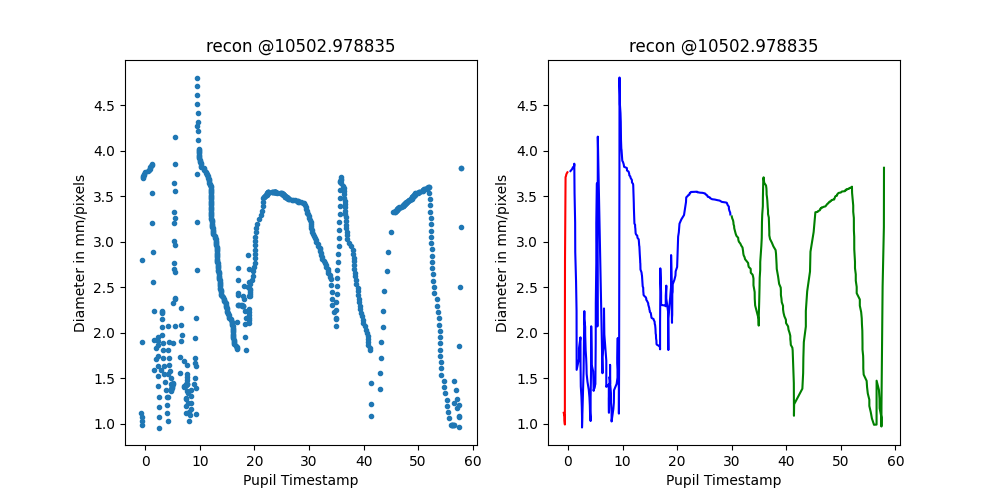

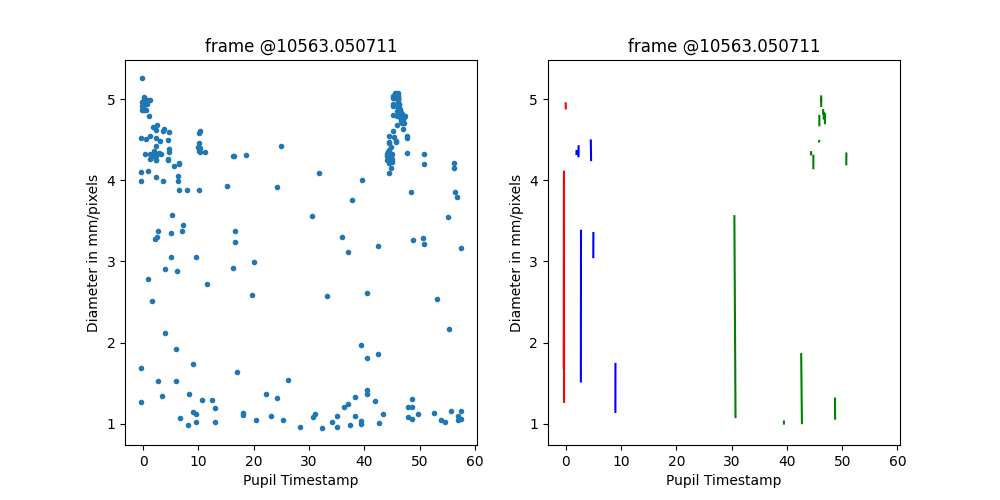

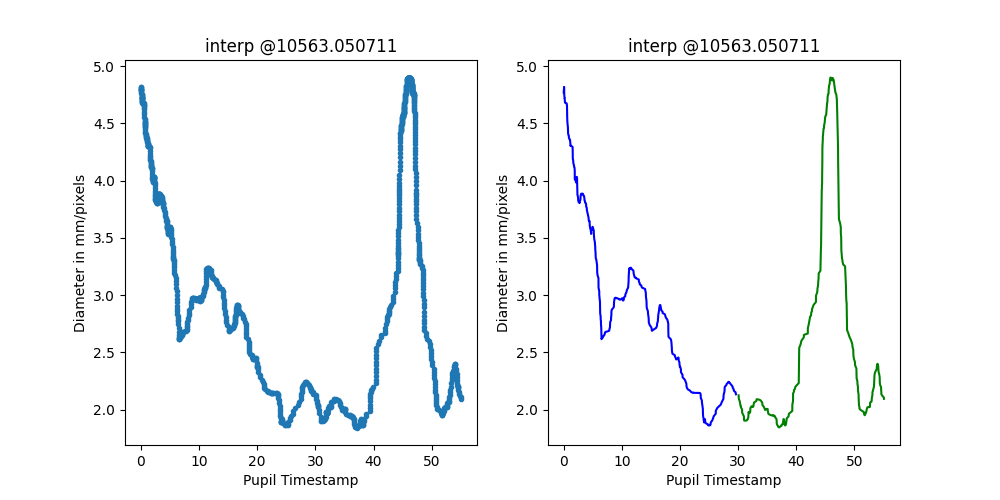

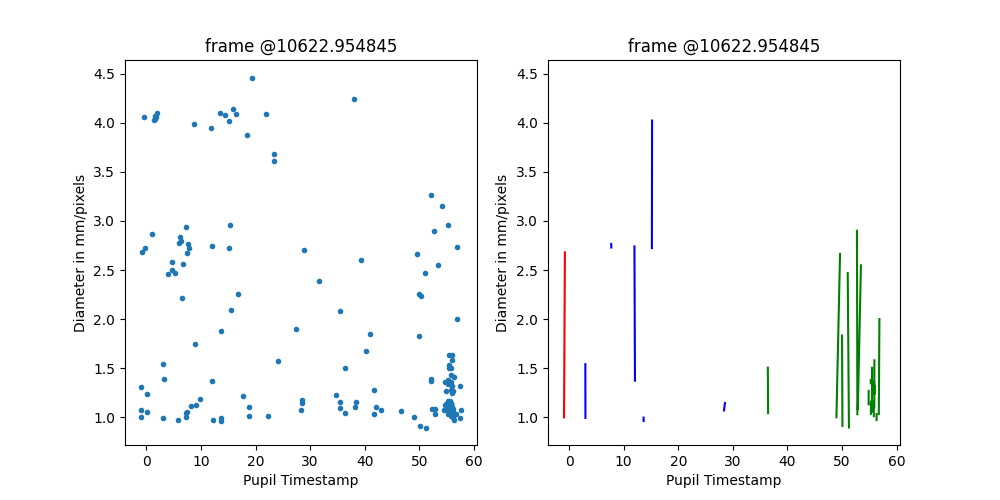

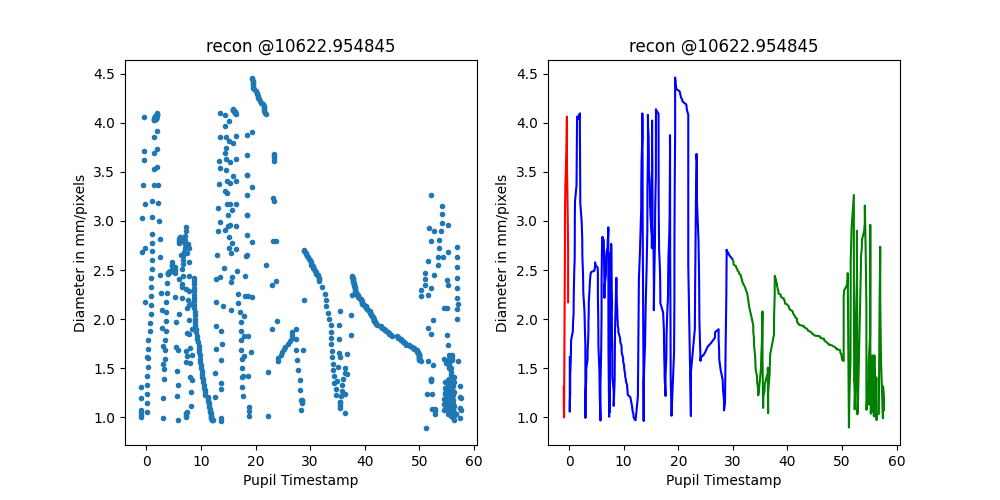

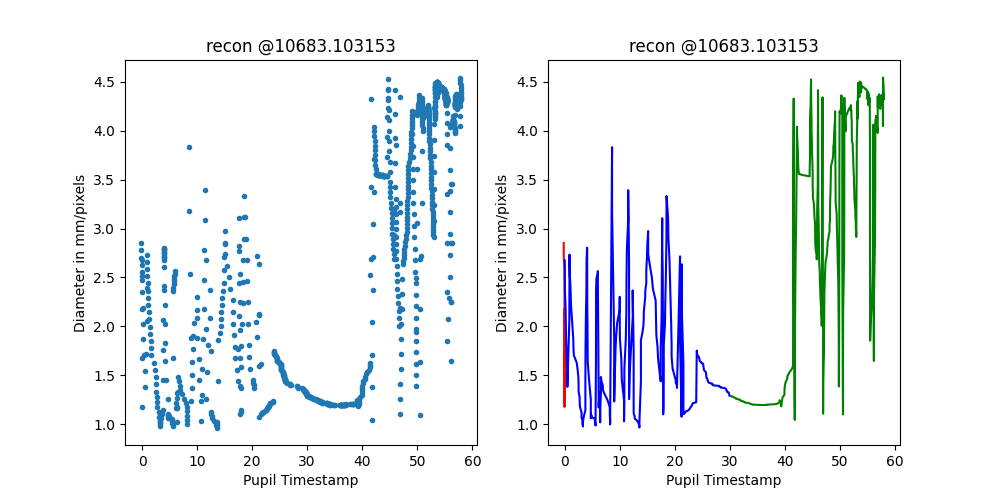

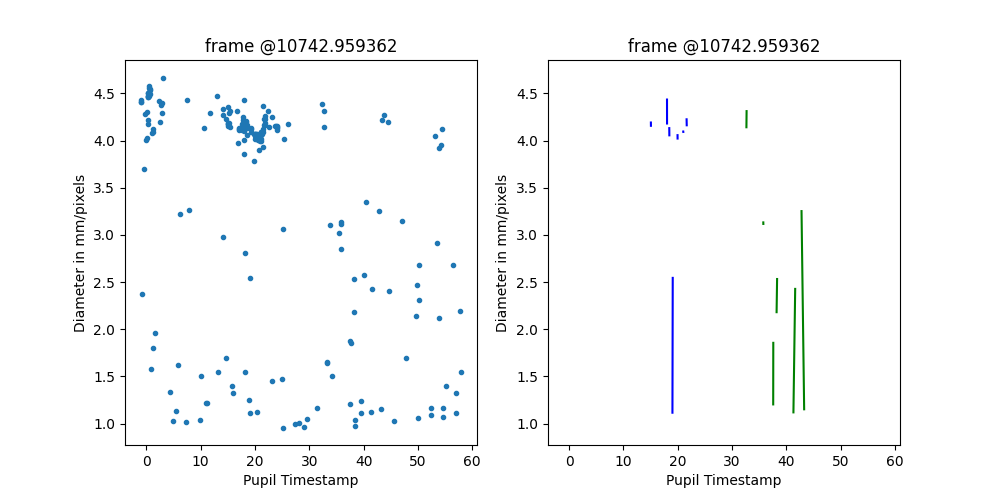

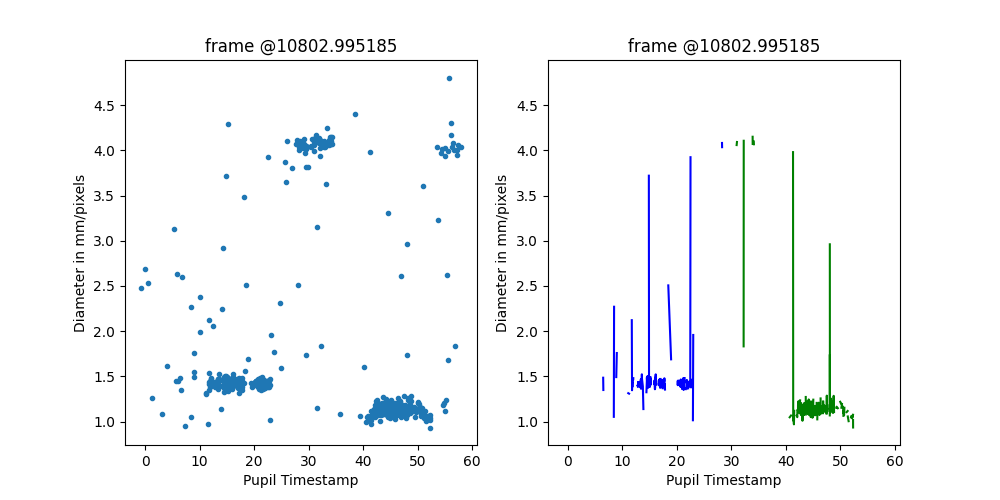

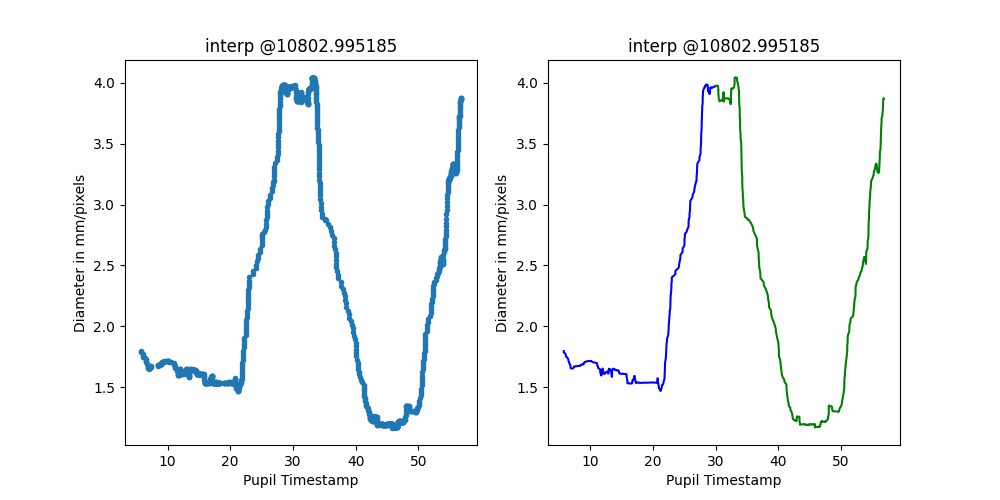

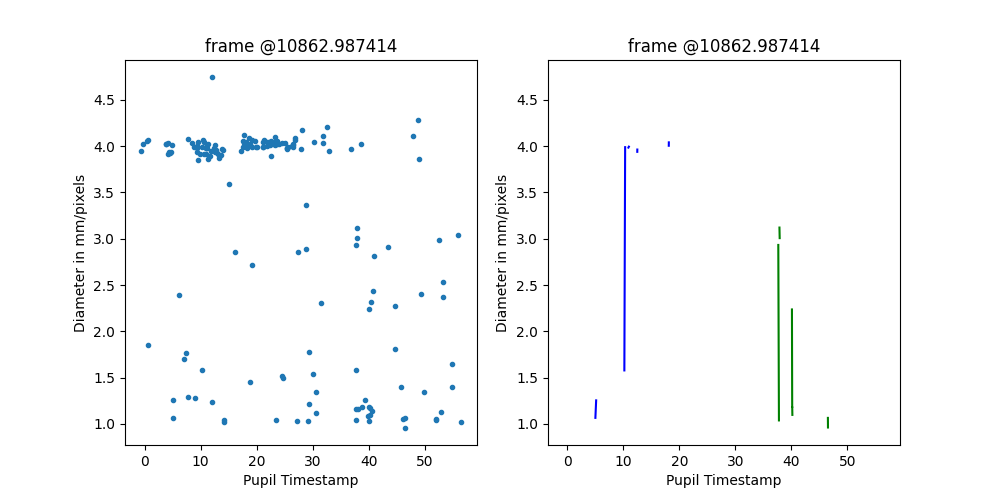

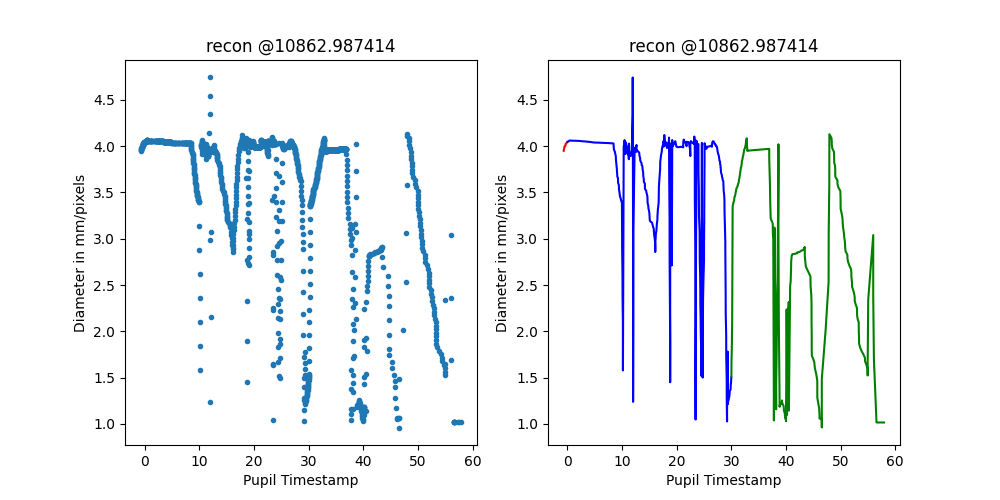

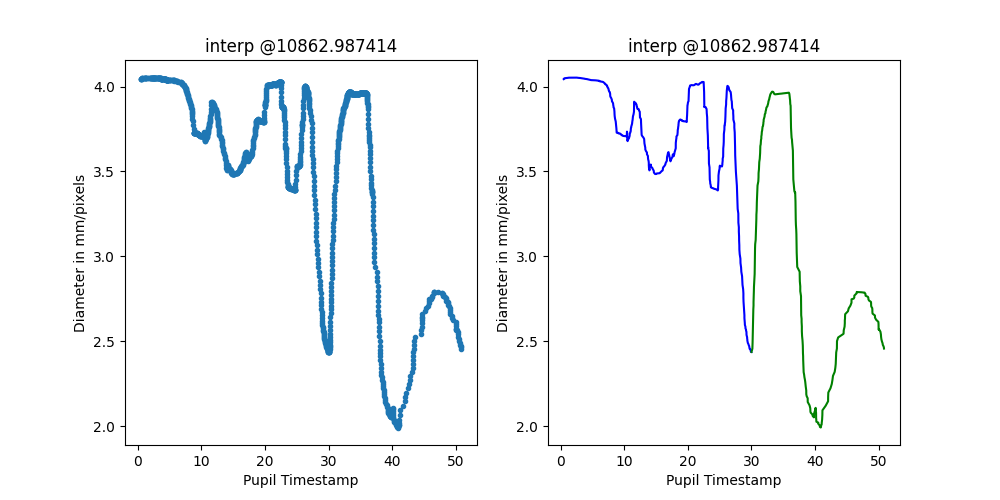

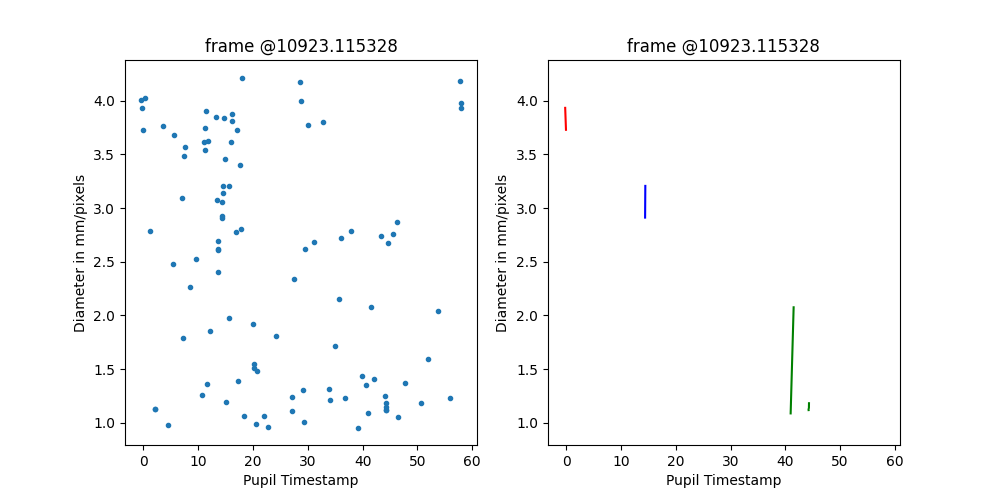

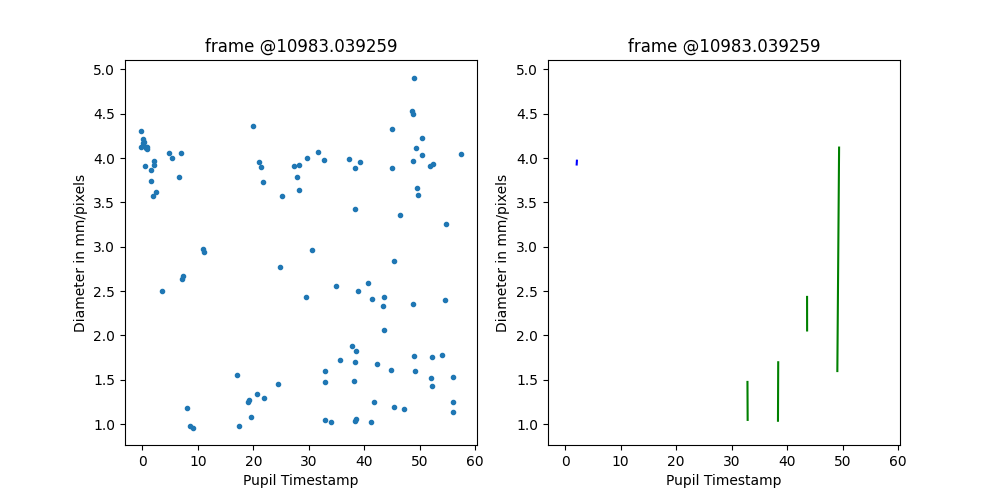

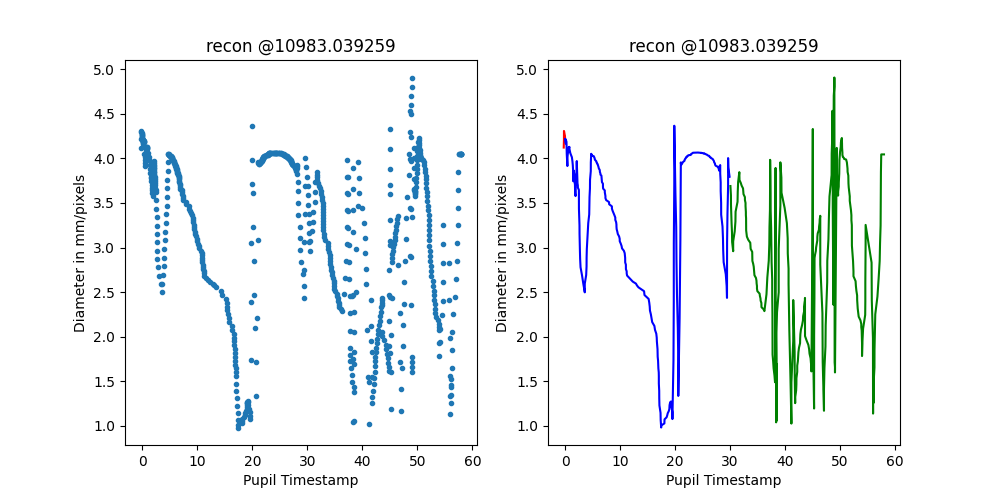

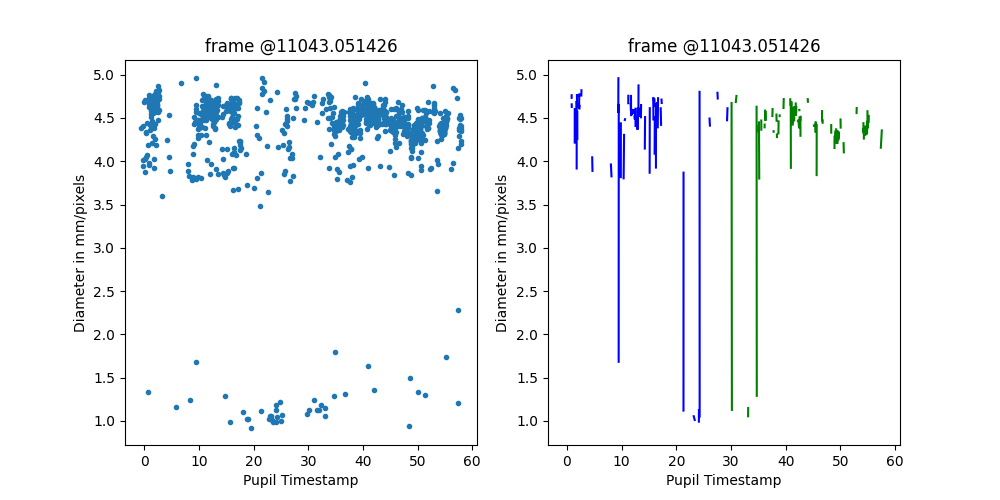

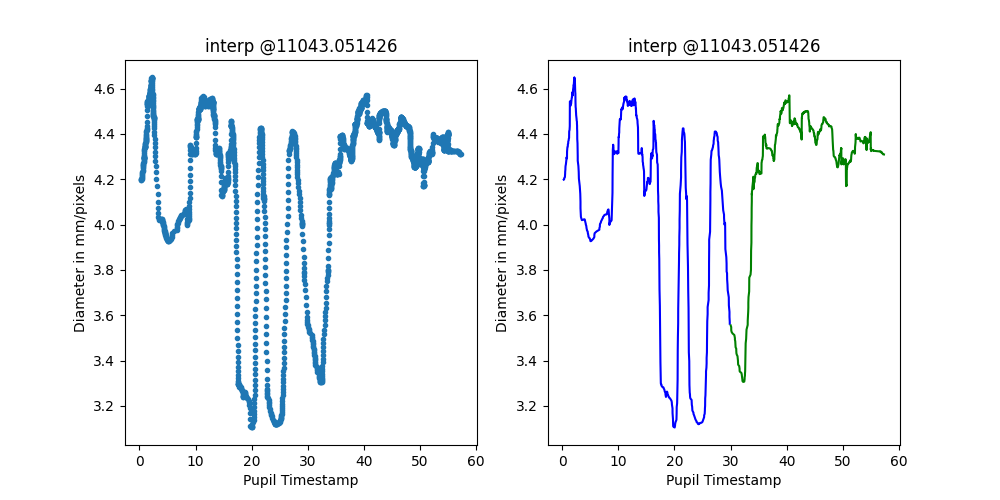

In [80]:
import preprocessing
import plotting
import math
import os

importlib.reload(preprocessing)
importlib.reload(plotting)
importlib.reload(checkdata)

def plot(df,text,xcol,ycol):
    plotting.plot_preprocessed(df,text,xcol,ycol)
    
def noplot(df,text,xcol,ycol):
    pass


if os.getlogin()=='marco':
    subject_id="PJ06_3_Ruhe"
    data_dir="/home/marco/Nextcloud/KatharinaBeispieldaten/"
else:
    subject_id="PJ02_1_Ruhe"
    data_dir="/Users/Katharina/Desktop/Beispieldaten"

field="diameter_3d"

config=preprocessing.create_process_config(0,field,subject_id,data_dir)

# Set this to False, if you want to process the data
# Set this to True, if you only want to return an array of data checks 
# config.validate_only=True

#config.noise_rejection_percent=5
#config.noise_threshold_factor=12
eye0=preprocessing.process(config,display)

if True: 
    if config.validate_only:
        # no data, just a structure containing annotation indices and error estimates
        display(eye0) 
    else:
        for what in eye0:
            ts=what['pupil_timestamp'].iloc[0]
            plot(what,f"frame @{ts}","pupil_timestamp_based",f"{field}_original")
            plot(what,f"recon @{ts}","pupil_timestamp_based",f"{field}_rec")
            plot(what,f"interp @{ts}","pupil_timestamp_based",f"{field}_rec_interp_100")

        if False:
            for what in eye0:
                plotting.plot_preprocessed(what,f"frame @what.pupil_timestamp[0]","pupil_timestamp_based",f"{field}_gated")

        display(f"Anzahl der Messungen: {len(eye0)}")
        if False:
            sub=None
            i=0
            for what in eye0:
                preprocessing.create_baseline_column(what, f'{field}_original',f'{field}_original_baseline')
                sub = what.plot(ax=sub,x='pupil_timestamp_based', y=f'{field}_baseline',ylabel=f'baseline adjusted pupil size', kind='line')        
                sub.set_ylabel(f'measurement {i}, {field}')
                i=i+1



In [ ]:
### Use datamatrix from pydatamatrix.eu to fill in blinking gaps

In [37]:
importlib.reload(preprocessing)
display(preprocessing.get_condition("PJ01_4_Ruhe"))

(30, '30Placebo')

In [28]:
x='PJ01_3_PLR2' 
display(x[:4])

'PJ01'

In [22]:
display(x[5:6])

'4'